In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

In [3]:
df_train = pd.read_csv("../model_amp/model_0710/X_train.csv")
df_val = pd.read_csv("../model_amp/model_0710/X_val.csv")
df_test = pd.read_csv("../model_amp/model_0710/X_test.csv")

In [4]:
df_train["label"].value_counts()

label
0    7641
1    7637
Name: count, dtype: int64

In [5]:
df_val["label"].value_counts()

label
1    1913
0    1907
Name: count, dtype: int64

In [34]:
df_val.head()

,mw,hydrophobic_ratio,boman_index,instability_index,charge_density,isoelectric_point,label
0,1584.01,0.64286,-1.17429,-0.53571,0.00189,13.00000,1
1,3508.20,0.42424,0.95818,9.72121,0.00139,10.51270,1
2,3450.81,0.11429,3.49086,53.70000,0.00319,13.92188,1
3,7490.70,0.43750,2.10953,42.41406,-0.00029,4.78564,1
4,2448.62,0.26087,2.76043,76.99565,0.00045,9.83984,0


In [6]:
df_test["label"].value_counts()

label
0    1062
1    1060
Name: count, dtype: int64

In [7]:
X_train = df_train.drop(columns=["label"])
y_train = df_train["label"].values

X_val = df_val.drop(columns=["label"]).values
y_val = df_val["label"].values

X_test = df_test.drop(columns=["label"]).values
y_test = df_test["label"].values

In [9]:
from joblib import load

In [10]:
scaler = load("../model_amp/model_0710/scaler.joblib")

In [12]:
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [31]:
X_val.shape

(3820, 6)

In [32]:
X_test.shape

(2122, 6)

In [36]:
pd.DataFrame(X_val, columns=["mw", "hydrophobic_ratio", "boman_index",
                             "instability_index", "charge_density", "isoelectric_point"])

,mw,hydrophobic_ratio,boman_index,instability_index,charge_density,isoelectric_point
0,-1.520002,10.311650,-2.004927,-1.207500,449.393657,-3.055025
1,-1.519694,-1.945045,-1.127920,-1.200112,152.408145,-3.353397
2,-1.519703,-19.322058,-0.086321,-1.168431,1221.555989,-2.944438
3,-1.519056,-1.201637,-0.654411,-1.176561,-845.463176,-4.040403
4,-1.519863,-11.104208,-0.386720,-1.151649,-405.924618,-3.434111
...,...,...,...,...,...,...
3815,-1.520021,-7.041816,-1.456182,-1.189964,-227.733311,-3.446060
3816,-1.519500,-3.304034,-0.892751,-1.163710,-423.743749,-3.387955
3817,-1.519859,2.302358,-1.216901,-1.205995,1708.612229,-3.225825
3818,-1.518721,3.913635,-1.282082,-1.170984,-631.633608,-3.729906


In [33]:
y_val.shape

(3820,)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [20]:
from sklearn.metrics import accuracy_score, PrecisionRecallDisplay, RocCurveDisplay, ConfusionMatrixDisplay, f1_score, recall_score, matthews_corrcoef, precision_score

In [16]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X=X_train, y=y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X=X_train, y=y_train)

gausian_nb_model = GaussianNB()
gausian_nb_model.fit(X=X_train, y=y_train)

svc_model = SVC(random_state=42)
svc_model.fit(X=X_train, y=y_train)

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X=X_train, y=y_train)

random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X=X_train, y=y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [18]:
y_val_predict_lr = logistic_model.predict(X_val)
y_val_predict_knn = knn_model.predict(X_val)
y_val_predict_nv = gausian_nb_model.predict(X_val)
y_val_predict_svm = svc_model.predict(X_val)
y_val_predict_dt = decision_tree_model.predict(X_val)
y_val_predict_rf = random_forest_model.predict(X_val)

In [28]:
import matplotlib.pyplot as plt

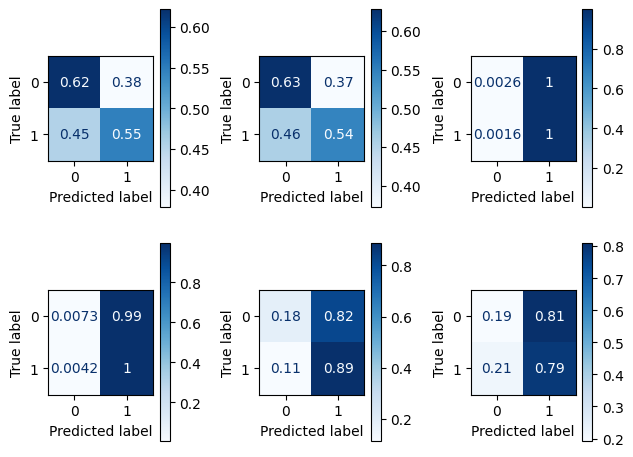

In [30]:
fig, axis = plt.subplots(2, 3)

ConfusionMatrixDisplay.from_estimator(
    logistic_model,
    X_val,
    y_val,
    normalize="true",
    cmap="Blues",
    ax=axis[0][0]
)

ConfusionMatrixDisplay.from_estimator(
    knn_model,
    X_val,
    y_val,
    normalize="true",
    cmap="Blues",
    ax=axis[0][1]
)

ConfusionMatrixDisplay.from_estimator(
    svc_model,
    X_val,
    y_val,
    normalize="true",
    cmap="Blues",
    ax=axis[0][2]
)

ConfusionMatrixDisplay.from_estimator(
    gausian_nb_model,
    X_val,
    y_val,
    normalize="true",
    cmap="Blues",
    ax=axis[1][0]
)

ConfusionMatrixDisplay.from_estimator(
    decision_tree_model,
    X_val,
    y_val,
    normalize="true",
    cmap="Blues",
    ax=axis[1][1]
)

ConfusionMatrixDisplay.from_estimator(
    random_forest_model,
    X_val,
    y_val,
    normalize="true",
    cmap="Blues",
    ax=axis[1][2]
)

plt.tight_layout()